# Two-Level: Sech Pulse 2π — Self-Induced Transparency

Time taken to solve this problem on a 2013 MacBook Pro:
**28s**

## Define the Problem

First we need to define a sech pulse with the area we want. We'll fix the width of the pulse and the area to find the right amplitude.

The full-width at half maximum (FWHM) $t_s$ of the sech pulse is related to the FWHM of a Gaussian by a factor of $1/2.6339157938$. (See §3.2.2 of my [PhD thesis](https://github.com/tommyogden/phd-thesis)).

We then obtain the amplitude $a$ we need from

$$
a = \frac{n}{2 \pi ~ t_s}
$$

In [15]:
import numpy as np

SECH_FWHM_CONV = 1./2.6339157938
t_width = 1.0*SECH_FWHM_CONV # [τ]
print('t_width', t_width)

n = 2.0 # For a pulse area of nπ    
ampl = n/t_width/(2*np.pi) # Pulse amplitude [2π Γ]
print('ampl', ampl)

t_width 0.3796628587572578
ampl 0.8384014365421667


In [16]:
mb_solve_json = """
{
  "atom": {
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 0.0,
        "rabi_freq": 0.8384014365421667,
        "rabi_freq_t_args": {
          "ampl": %f,
          "centre": 0.0,
          "width": %f
        },
        "rabi_freq_t_func": "sech"
      }
    ],
    "num_states": 2
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 120,
  "z_min": -0.5,
  "z_max": 1.5,
  "z_steps": 100,
  "interaction_strengths": [
    10.0
  ],
  "savefile": "mbs-two-sech-2pi"
}
"""%(ampl, t_width)

In [17]:
from maxwellbloch import mb_solve
mb_solve_00 = mb_solve.MBSolve().from_json_str(mb_solve_json)

We'll just check that the pulse area is what we want.

In [18]:
print('The input pulse area is {0}'.format(np.trapz(mb_solve_00.Omegas_zt[0,0,:].real, 
                                                    mb_solve_00.tlist)/np.pi))

The input pulse area is 1.6712682388547877


## Solve the Problem

In [19]:
%time Omegas_zt, states_zt = mb_solve_00.mbsolve(recalc=False)

10.0%. Run time:   2.65s. Est. time left: 00:00:00:23
20.0%. Run time:   5.37s. Est. time left: 00:00:00:21
30.0%. Run time:  11.23s. Est. time left: 00:00:00:26
40.0%. Run time:  17.54s. Est. time left: 00:00:00:26
50.0%. Run time:  23.05s. Est. time left: 00:00:00:23
60.0%. Run time:  28.83s. Est. time left: 00:00:00:19
70.0%. Run time:  34.90s. Est. time left: 00:00:00:14
80.0%. Run time:  40.96s. Est. time left: 00:00:00:10
90.0%. Run time:  46.95s. Est. time left: 00:00:00:05
Total run time:  53.97s
CPU times: user 52.1 s, sys: 355 ms, total: 52.4 s
Wall time: 54.1 s


## Plot Output

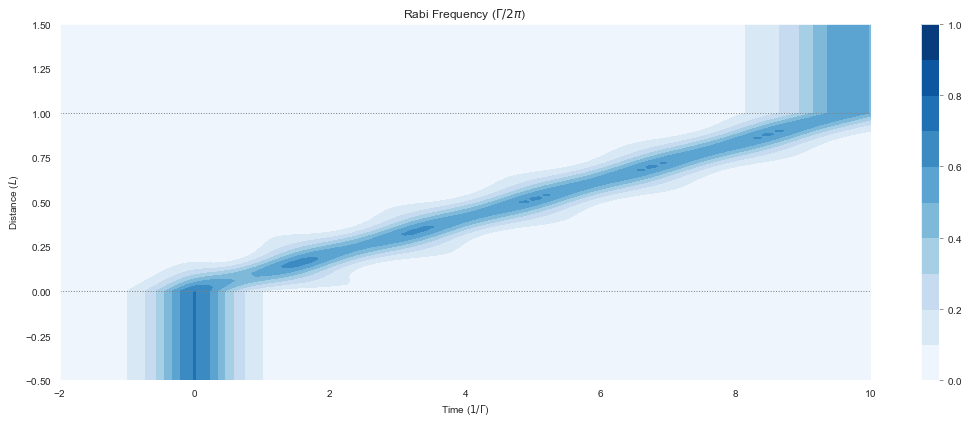

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set_style("darkgrid")

fig = plt.figure(1, figsize=(16, 6))
ax = fig.add_subplot(111)
cmap_range = np.linspace(0.0, 1.0, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf);

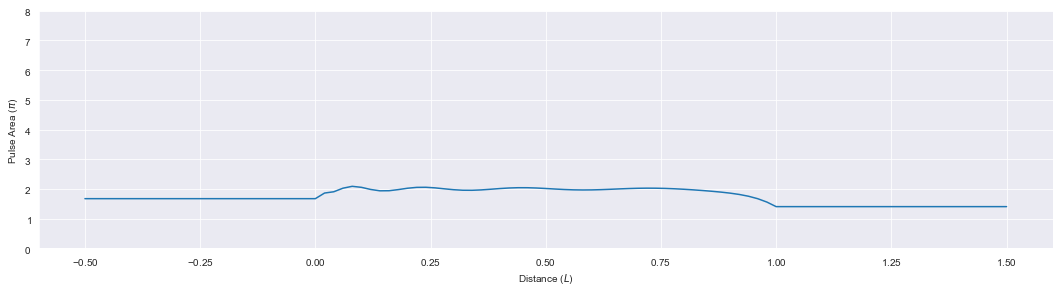

In [21]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(mb_solve_00.zlist, mb_solve_00.fields_area()[0]/np.pi, clip_on=False)
ax.set_ylim([0.0, 8.0])
ax.set_xlabel('Distance ($L$)')
ax.set_ylabel('Pulse Area ($\pi$)');

## Analysis

The $2 \pi$ sech pulse passes through, slowed but with shape unaltered. This is **self-induced transparency.**

## Movie

In [22]:
# C = 0.1 # speed of light
# Y_MIN = 0.0 # Y-axis min
# Y_MAX = 4.0 # y-axis max
# ZOOM = 2 # level of linear interpolation
# FPS = 30 # frames per second
# ATOMS_ALPHA = 0.2 # Atom indicator transparency

In [23]:
# FNAME = "images/mb-solve-two-sech-2pi"
# FNAME_JSON = FNAME + '.json'
# with open(FNAME_JSON, "w") as f:
#     f.write(mb_solve_json)

In [24]:
# !make-mp4-fixed-frame.py -f $FNAME_JSON -c $C --fps $FPS --y-min $Y_MIN --y-max $Y_MAX \
#     --zoom $ZOOM --atoms-alpha $ATOMS_ALPHA #--peak-line --c-line

In [25]:
# FNAME_MP4 = FNAME + '.mp4'
# !make-gif-ffmpeg.sh -f $FNAME_MP4 --in-fps $FPS

In [26]:
# from IPython.display import Image
# Image(url=FNAME_MP4 +'.gif', format='gif')